In [ ]:
#Conduct EDA on NBA players with a Max contract to examine relationships that could improve overall perforance.
#We are looking at Devin Booker and trying to decide whether or not he deserves a max contract.

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [449]:
stats = pd.read_csv('BOOKER_CLEANED.CSV')

In [450]:
stats

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2015-16,19,Booker,NBA,SG,76,51,27.7,4.8,11.4,...,0.840,0.4,2.1,2.5,2.6,0.6,0.3,2.1,3.0,13.8
1,2016-17,20,Booker,NBA,SG,78,78,35.0,7.8,18.3,...,0.832,0.6,2.6,3.2,3.4,0.9,0.3,3.1,3.1,22.1
2,2017-18,21,Booker,NBA,SG,54,54,34.5,8.4,19.5,...,0.878,0.5,4.0,4.5,4.7,0.9,0.3,3.6,3.1,24.9
3,2018-19,22,Booker,NBA,SG,64,64,35.0,9.2,19.6,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
4,2019-20,23,Booker,NBA,SG,70,70,35.9,9.0,18.3,...,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-22,33,Westbrook,NBA,PG,78,78,34.3,7.0,15.8,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
60,2018-19,19,Doncic,NBA,SG,72,72,32.2,7.0,16.5,...,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2
61,2019-20,20,Doncic,NBA,PG,61,61,33.6,9.5,20.6,...,0.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8
62,2020-21,21,Doncic,NBA,PG,66,66,34.3,9.8,20.5,...,0.730,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7


In [451]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  64 non-null     object 
 1   Age     64 non-null     int64  
 2   Player  64 non-null     object 
 3   Lg      64 non-null     object 
 4   Pos     64 non-null     object 
 5   G       64 non-null     int64  
 6   GS      64 non-null     int64  
 7   MP      64 non-null     float64
 8   FG      64 non-null     float64
 9   FGA     64 non-null     float64
 10  FG%     64 non-null     float64
 11  3P      64 non-null     float64
 12  3PA     64 non-null     float64
 13  3P%     64 non-null     float64
 14  2P      64 non-null     float64
 15  2PA     64 non-null     float64
 16  2P%     64 non-null     float64
 17  eFG%    64 non-null     float64
 18  FT      64 non-null     float64
 19  FTA     64 non-null     float64
 20  FT%     64 non-null     float64
 21  ORB     64 non-null     float64
 22  DRB 

In [452]:
stats["PTS"].unique()

array([13.8, 22.1, 24.9, 26.6, 25.6, 26.8, 17.5, 18.6, 14.7, 22.9, 24. ,
       23.8, 30.1, 25.3, 26.4, 27.3, 20.8, 32. , 25.5, 12.5, 16.6, 18.4,
       21.7, 22.3, 20. , 21.5, 20.4,  9.9, 12.2, 16.8, 25.9, 25.4, 27.4,
       29. , 29.1, 30.4, 36.1, 34.3, 24.6, 24.8, 22. , 22.5, 21. , 15.3,
       16.1, 21.9, 23.6, 23.2, 21.8, 28.1, 23.5, 31.6, 27.2, 22.2, 18.5,
       21.2, 28.8, 27.7, 28.4])

In [453]:
booker=stats[stats.Player=="Booker"]
booker
#0-6

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2015-16,19,Booker,NBA,SG,76,51,27.7,4.8,11.4,...,0.840,0.4,2.1,2.5,2.6,0.6,0.3,2.1,3.0,13.8
1,2016-17,20,Booker,NBA,SG,78,78,35.0,7.8,18.3,...,0.832,0.6,2.6,3.2,3.4,0.9,0.3,3.1,3.1,22.1
2,2017-18,21,Booker,NBA,SG,54,54,34.5,8.4,19.5,...,0.878,0.5,4.0,4.5,4.7,0.9,0.3,3.6,3.1,24.9
3,2018-19,22,Booker,NBA,SG,64,64,35.0,9.2,19.6,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
4,2019-20,23,Booker,NBA,SG,70,70,35.9,9.0,18.3,...,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
5,2020-21,24,Booker,NBA,SG,67,67,33.9,9.3,19.2,...,0.867,0.5,3.7,4.2,4.3,0.8,0.2,3.1,2.7,25.6
6,2021-22,25,Booker,NBA,SG,68,68,34.5,9.7,20.9,...,0.868,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8


In [454]:
curry=stats[stats.Player=="Curry"]
curry
#7-19

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,2009-10,21,Curry,NBA,PG,80,77,36.2,6.6,14.3,...,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
8,2010-11,22,Curry,NBA,PG,74,74,33.6,6.8,14.2,...,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
9,2011-12,23,Curry,NBA,PG,26,23,28.2,5.6,11.4,...,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7
10,2012-13,24,Curry,NBA,PG,78,78,38.2,8.0,17.8,...,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9
11,2013-14,25,Curry,NBA,PG,78,78,36.5,8.4,17.7,...,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0
12,2014-15,26,Curry,NBA,PG,80,80,32.7,8.2,16.8,...,0.914,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8
13,2015-16,27,Curry,NBA,PG,79,79,34.2,10.2,20.2,...,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1
14,2016-17,28,Curry,NBA,PG,79,79,33.4,8.5,18.3,...,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3
15,2017-18,29,Curry,NBA,PG,51,51,32.0,8.4,16.9,...,0.921,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4
16,2018-19,30,Curry,NBA,PG,69,69,33.8,9.2,19.4,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


In [455]:
thompson=stats[stats.Player=="Thompson"]
thompson
#20-28

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20,2011-12,21,Thompson,NBA,SG,66,29,24.4,4.8,10.9,...,0.868,0.4,2.1,2.4,2.0,0.7,0.3,1.6,2.3,12.5
21,2012-13,22,Thompson,NBA,SG,82,82,35.8,6.2,14.7,...,0.841,0.4,3.3,3.7,2.2,1.0,0.5,1.9,2.9,16.6
22,2013-14,23,Thompson,NBA,SG,81,81,35.4,6.9,15.5,...,0.795,0.5,2.6,3.1,2.2,0.9,0.5,1.7,2.9,18.4
23,2014-15,24,Thompson,NBA,SG,77,77,31.9,7.8,16.9,...,0.879,0.4,2.9,3.2,2.9,1.1,0.8,1.9,1.6,21.7
24,2015-16,25,Thompson,NBA,SG,80,80,33.3,8.1,17.3,...,0.873,0.4,3.4,3.8,2.1,0.8,0.6,1.7,1.9,22.1
25,2016-17,26,Thompson,NBA,SG,78,78,34.0,8.3,17.6,...,0.853,0.6,3.0,3.7,2.1,0.8,0.5,1.6,1.8,22.3
26,2017-18,27,Thompson,NBA,SG,73,73,34.3,7.9,16.2,...,0.837,0.4,3.4,3.8,2.5,0.8,0.5,1.8,1.6,20.0
27,2018-19,28,Thompson,NBA,SG,78,78,34.0,8.4,18.0,...,0.816,0.5,3.4,3.8,2.4,1.1,0.6,1.5,2.0,21.5
28,2021-22,31,Thompson,NBA,SG,32,32,29.4,7.7,17.9,...,0.902,0.5,3.4,3.9,2.8,0.5,0.5,1.3,1.7,20.4


In [456]:
harden=stats[stats.Player=="Harden"]
harden
#29-45

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
29,2009-10,20,Harden,NBA,SG,76,0,22.9,3.1,7.6,...,0.808,0.6,2.6,3.2,1.8,1.1,0.3,1.4,2.6,9.9
30,2010-11,21,Harden,NBA,SG,82,5,26.7,3.6,8.3,...,0.843,0.5,2.6,3.1,2.1,1.1,0.3,1.3,2.5,12.2
31,2011-12,22,Harden,NBA,SG,62,2,31.4,5.0,10.1,...,0.846,0.5,3.6,4.1,3.7,1.0,0.2,2.2,2.4,16.8
32,2012-13,23,Harden,NBA,SG,78,78,38.3,7.5,17.1,...,0.851,0.8,4.1,4.9,5.8,1.8,0.5,3.8,2.3,25.9
33,2013-14,24,Harden,NBA,SG,73,73,38.0,7.5,16.5,...,0.866,0.8,3.9,4.7,6.1,1.6,0.4,3.6,2.4,25.4
34,2014-15,25,Harden,NBA,SG,81,81,36.8,8.0,18.1,...,0.868,0.9,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4
35,2015-16,26,Harden,NBA,SG,82,82,38.1,8.7,19.7,...,0.860,0.8,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0
36,2016-17,27,Harden,NBA,PG,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
37,2017-18,28,Harden,NBA,SG,72,72,35.4,9.0,20.1,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
38,2018-19,29,Harden,NBA,PG,78,78,36.8,10.8,24.5,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [457]:
westbrook=stats[stats.Player=="Westbrook"]
westbrook
#46-59

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
46,2008-09,20,Westbrook,NBA,PG,82,65,32.5,5.3,13.4,...,0.815,2.2,2.7,4.9,5.3,1.3,0.2,3.3,2.3,15.3
47,2009-10,21,Westbrook,NBA,PG,82,82,34.3,5.9,14.1,...,0.780,1.7,3.1,4.9,8.0,1.3,0.4,3.3,2.5,16.1
48,2010-11,22,Westbrook,NBA,PG,82,82,34.7,7.5,17.0,...,0.842,1.5,3.1,4.6,8.2,1.9,0.4,3.9,2.5,21.9
49,2011-12,23,Westbrook,NBA,PG,66,66,35.3,8.8,19.2,...,0.823,1.5,3.1,4.6,5.5,1.7,0.3,3.6,2.2,23.6
50,2012-13,24,Westbrook,NBA,PG,82,82,34.9,8.2,18.7,...,0.800,1.4,3.9,5.2,7.4,1.8,0.3,3.3,2.3,23.2
51,2013-14,25,Westbrook,NBA,PG,46,46,30.7,7.5,17.2,...,0.826,1.2,4.5,5.7,6.9,1.9,0.2,3.8,2.3,21.8
52,2014-15,26,Westbrook,NBA,PG,67,67,34.4,9.4,22.0,...,0.835,1.9,5.4,7.3,8.6,2.1,0.2,4.4,2.7,28.1
53,2015-16,27,Westbrook,NBA,PG,80,80,34.4,8.2,18.1,...,0.812,1.8,6.0,7.8,10.4,2.0,0.3,4.3,2.5,23.5
54,2016-17,28,Westbrook,NBA,PG,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
55,2017-18,29,Westbrook,NBA,PG,80,80,36.4,9.5,21.1,...,0.737,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4


In [458]:
doncic=stats[stats.Player=="Doncic"]
doncic
#60-63

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
60,2018-19,19,Doncic,NBA,SG,72,72,32.2,7.0,16.5,...,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2
61,2019-20,20,Doncic,NBA,PG,61,61,33.6,9.5,20.6,...,0.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8
62,2020-21,21,Doncic,NBA,PG,66,66,34.3,9.8,20.5,...,0.730,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7
63,2021-22,22,Doncic,NBA,PG,65,65,35.4,9.9,21.6,...,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4


In [462]:
no_booker=stats[stats.Player!="Booker"]
no_booker

,Season,Age,Player,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,2009-10,21,Curry,NBA,PG,80,77,36.2,6.6,14.3,...,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
8,2010-11,22,Curry,NBA,PG,74,74,33.6,6.8,14.2,...,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
9,2011-12,23,Curry,NBA,PG,26,23,28.2,5.6,11.4,...,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7
10,2012-13,24,Curry,NBA,PG,78,78,38.2,8.0,17.8,...,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9
11,2013-14,25,Curry,NBA,PG,78,78,36.5,8.4,17.7,...,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0
12,2014-15,26,Curry,NBA,PG,80,80,32.7,8.2,16.8,...,0.914,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8
13,2015-16,27,Curry,NBA,PG,79,79,34.2,10.2,20.2,...,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1
14,2016-17,28,Curry,NBA,PG,79,79,33.4,8.5,18.3,...,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3
15,2017-18,29,Curry,NBA,PG,51,51,32.0,8.4,16.9,...,0.921,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4
16,2018-19,30,Curry,NBA,PG,69,69,33.8,9.2,19.4,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


In [460]:
stats.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,-0.404859,-0.069013,0.329747,0.336615,0.367127,-0.002849,0.373374,0.454377,-0.094553,...,0.119107,0.098973,0.486901,0.450469,0.469485,0.174121,0.335756,0.327764,-0.134096,0.400010
G,-0.404859,1.000000,0.715810,0.138540,0.105157,0.086632,0.078451,-0.070949,-0.192517,0.148850,...,-0.240984,0.166183,-0.151771,-0.099337,-0.225357,0.256819,-0.135303,-0.059172,0.209277,0.019946
GS,-0.069013,0.715810,1.000000,0.577950,0.547578,0.550446,0.167406,0.139464,0.070446,0.096076,...,-0.167271,0.260118,0.096996,0.140444,0.109734,0.365041,0.032502,0.263848,0.145490,0.421601
MP,0.329747,0.138540,0.577950,1.000000,0.550948,0.581908,0.082576,0.175504,0.209699,-0.080259,...,-0.067481,0.212084,0.433359,0.429213,0.552590,0.361143,0.298263,0.605151,0.207758,0.608925
FG,0.336615,0.105157,0.547578,0.550948,1.000000,0.967313,0.424294,0.465520,0.513829,0.012707,...,-0.019902,0.206870,0.438223,0.426267,0.355707,0.315255,0.133151,0.522068,0.051561,0.905123
FGA,0.367127,0.086632,0.550446,0.581908,0.967313,1.000000,0.187890,0.390856,0.482552,-0.135766,...,-0.067749,0.311546,0.510010,0.513047,0.425483,0.340516,0.187620,0.608955,0.100670,0.906579
FG%,-0.002849,0.078451,0.167406,0.082576,0.424294,0.187890,1.000000,0.401073,0.262293,0.560287,...,0.156107,-0.299158,-0.102988,-0.159740,-0.117463,0.042471,-0.125692,-0.125670,-0.153147,0.276378
3P,0.373374,-0.070949,0.139464,0.175504,0.465520,0.390856,0.401073,1.000000,0.956669,0.633012,...,0.493208,-0.512669,0.039368,-0.076675,-0.055432,0.030838,0.237472,-0.043525,-0.325763,0.559332
3PA,0.454377,-0.192517,0.070446,0.209699,0.513829,0.482552,0.262293,0.956669,1.000000,0.418456,...,0.443858,-0.424779,0.196545,0.082046,0.085365,0.023031,0.312216,0.120314,-0.268464,0.652083
3P%,-0.094553,0.148850,0.096076,-0.080259,0.012707,-0.135766,0.560287,0.633012,0.418456,1.000000,...,0.449239,-0.693426,-0.394465,-0.500324,-0.442813,-0.061193,-0.001145,-0.485608,-0.280436,-0.015991


In [ ]:
sns.pairplot(stats)

<AxesSubplot:>

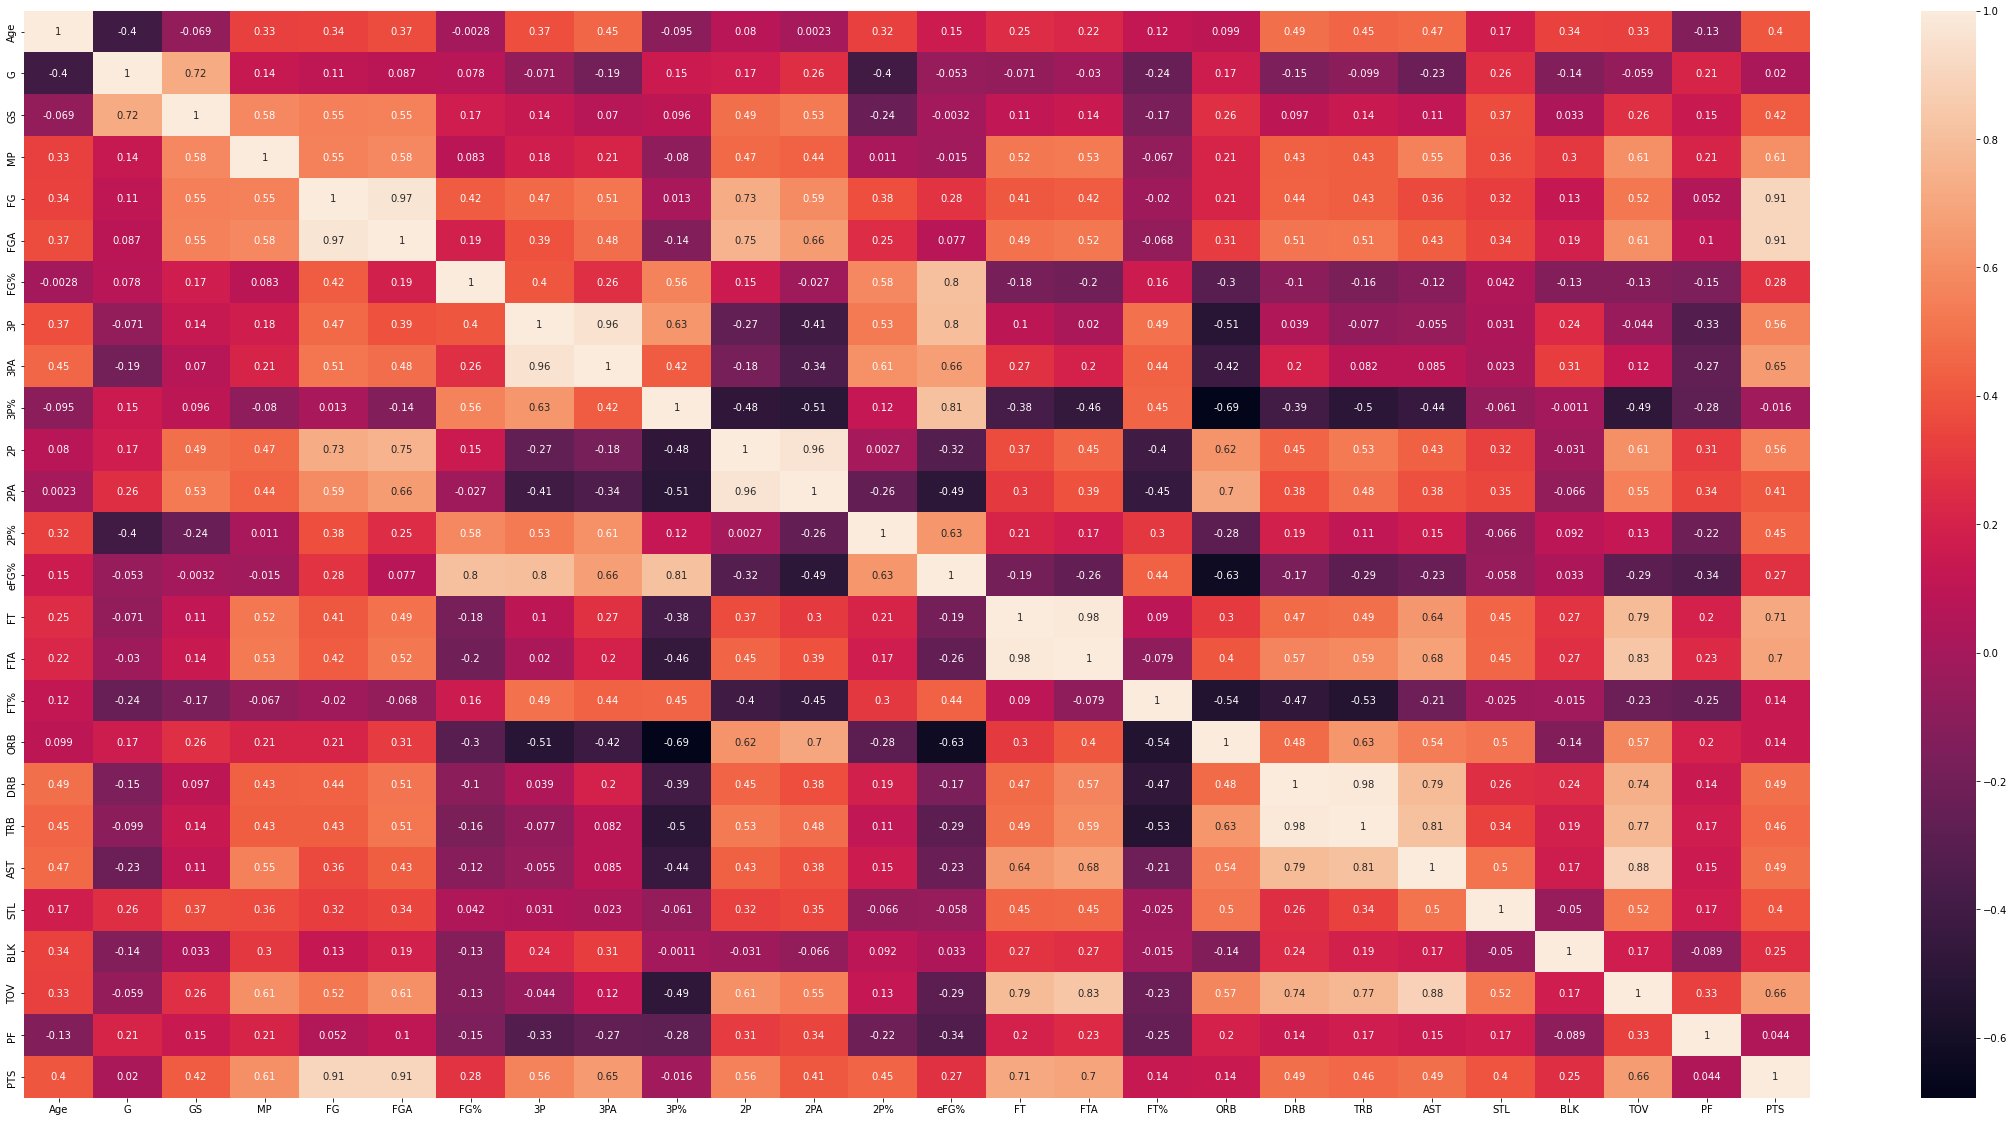

In [246]:
plt.figure(figsize=(40,20))
sns.heatmap(stats.corr(), annot=True)

In [247]:
#PTS and 3PA seem to have a relatively strong connection

<AxesSubplot:xlabel='PTS', ylabel='3PA'>

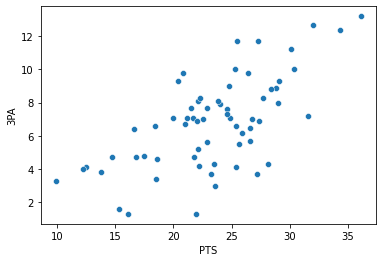

In [248]:
sns.scatterplot(x="PTS", y="3PA", data=stats)

<AxesSubplot:xlabel='PTS', ylabel='3PA'>

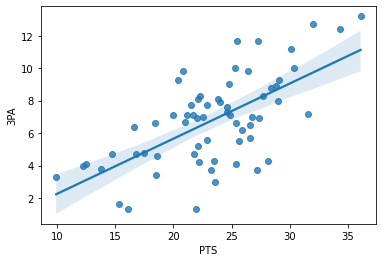

In [249]:
sns.regplot(x="PTS", y="3PA", data=stats)

In [250]:
#The plot suggests a linear progression, so lets see if Devin Booker shares this with players that have max contracts

array([[<AxesSubplot:title={'center':'PTS'}>]], dtype=object)

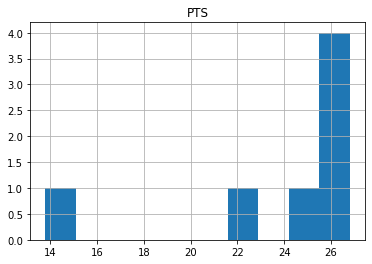

In [251]:
booker.hist(column="PTS")

array([[<AxesSubplot:title={'center':'PTS'}>]], dtype=object)

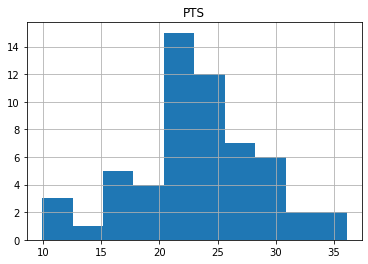

In [465]:
no_booker.hist(column="PTS")

<AxesSubplot:xlabel='Player', ylabel='PTS'>

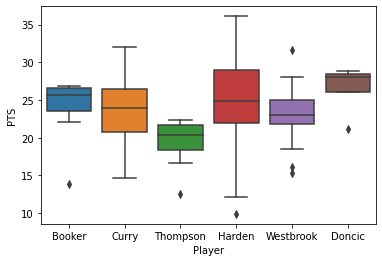

In [253]:
sns.boxplot(x="Player",y="PTS",data=stats)

In [254]:
#Booker's PTS are above average compared to other max players. He is still young so there isn't as much data for him.

array([[<AxesSubplot:title={'center':'3PA'}>]], dtype=object)

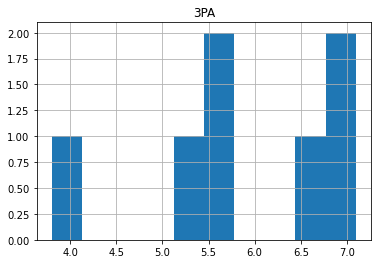

In [255]:
booker.hist(column="3PA")

array([[<AxesSubplot:title={'center':'3PA'}>]], dtype=object)

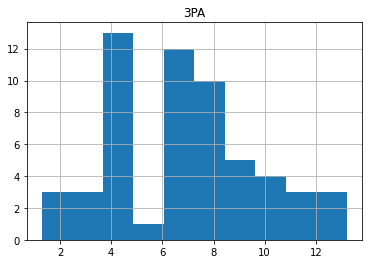

In [466]:
no_booker.hist(column="3PA")

<AxesSubplot:xlabel='Player', ylabel='3PA'>

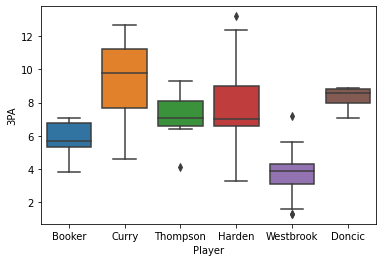

In [262]:
sns.boxplot(x="Player",y="3PA",data=stats)

In [257]:
#Booker's 3PA are about average compared to other max players. 
#His current average in 3PA is in the middle of the distrabution of 3PA for max players.
#Curry skews the data because his 3PA is so high, which is offest by Westbrook's very low 3PA

In [263]:
#From these observations we can see that Devin Booker could improve PTS by increasing 3PA by at least 1. 

In [470]:
no_booker.mean()

C:\Users\emili\AppData\Local\Temp/ipykernel_13968/1138973598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  no_booker.mean()


Age     26.228070
G       66.824561
GS      62.000000
MP      34.154386
FG       7.817544
FGA     17.350877
FG%      0.449702
3P       2.584211
3PA      6.912281
3P%      0.364316
2P       5.226316
2PA     10.443860
2P%      0.505193
eFG%     0.524298
FT       5.085965
FTA      6.077193
FT%      0.840421
ORB      0.938596
DRB      4.910526
TRB      5.838596
AST      6.777193
STL      1.407018
BLK      0.421053
TOV      3.422807
PF       2.417544
PTS     23.294737
dtype: float64

In [472]:
booker.mean()

C:\Users\emili\AppData\Local\Temp/ipykernel_13968/3057130007.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  booker.mean()


Age     22.000000
G       68.142857
GS      64.571429
MP      33.785714
FG       8.314286
FGA     18.171429
FG%      0.454857
3P       2.085714
3PA      5.828571
3P%      0.356000
2P       6.200000
2PA     12.357143
2P%      0.501000
eFG%     0.512000
FT       5.057143
FTA      5.828571
FT%      0.867143
ORB      0.528571
DRB      3.442857
TRB      3.957143
AST      4.728571
STL      0.842857
BLK      0.285714
TOV      3.171429
PF       2.942857
PTS     23.771429
dtype: float64

C:\Users\emili\AppData\Local\Temp/ipykernel_13968/2040679256.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  book=booker.mean()
C:\Users\emili\AppData\Local\Temp/ipykernel_13968/2040679256.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  no_book=no_booker.mean()


<AxesSubplot:>

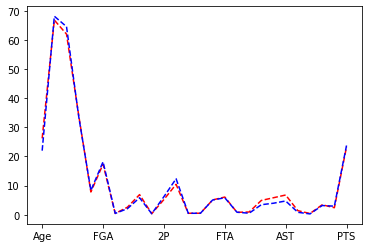

In [464]:
book=booker.mean()
no_book=no_booker.mean()
no_book.plot(color="r",style="--")
book.plot(color='b',style="--")


In [320]:
#Devin Booker should recieve the max contract due to his stats being closely correlated to current max contract players